In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

raw_train = train.copy()
raw_test = test.copy()

In [86]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [87]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [88]:
len(train['Id']), len(train['Id'].unique())

(1460, 1460)

In [89]:
len(train['MSSubClass']), len(train['MSSubClass'].unique())

(1460, 15)

In [90]:
all_data = pd.concat([train,test],ignore_index=True)
y = train['SalePrice']
all_data.drop('SalePrice',axis=1,inplace=True)

In [91]:
#train.drop('Id',axis=1,inplace=True)
#test.drop('Id',axis=1,inplace=True)

In [92]:
train.shape,test.shape, all_data.shape

((1460, 81), (1459, 80), (2919, 80))

In [93]:
plt.figure(figsize=(15,10))
#sns.heatmap(train.corr(),annot=True)

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [94]:
plt.figure(figsize=(10,10))
golden_feats = train.corr()[ abs(train.corr()['SalePrice']) > 0.5 ].index 
#sns.heatmap(train[golden_feats].corr(),annot=True)
golden_feats

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

In [95]:
#sns.barplot(train['OverallQual'],train['SalePrice'])

In [96]:
#sns.pairplot(train[golden_feats])

In [97]:
from scipy import stats
from scipy.stats import skew, norm

#sns.distplot(train['SalePrice'],fit=norm)

In [98]:
#stats.probplot(train['SalePrice'],plot=plt)
#plt.show()

In [99]:
#train['SalePrice'] = np.log1p(train['SalePrice'])
y = np.log1p(y)
#sns.distplot(train['SalePrice'],fit=norm)

In [100]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [101]:
#sns.scatterplot(train['GrLivArea'],y)

In [102]:
all_data[ all_data['GrLivArea']>4000]['GrLivArea']

523     4676
691     4316
1182    4476
1298    5642
2549    5095
Name: GrLivArea, dtype: int64

In [103]:
#all_data.drop( train[ train['GrLivArea']>4500].index ,inplace=True)
all_data.loc[  all_data['GrLivArea'] > 4500 , 'GrLivArea'] = all_data['GrLivArea'].median()
all_data.shape

(2919, 80)

In [104]:
num_feats = all_data.select_dtypes(exclude='object').columns
cate_feats = all_data.select_dtypes(include='object').columns

In [105]:
len(num_feats), len(cate_feats)

(37, 43)

In [106]:
all_data[num_feats].isnull().sum().sum()

678

In [107]:
all_data[num_feats] = all_data[num_feats].fillna(all_data[num_feats].median())

In [108]:
all_data[num_feats].isnull().sum().sum()

0

In [109]:
skewness = all_data[num_feats].skew()
skewness.sort_values(ascending=False)
skew_feats = skewness[ abs(skewness) > 0.5 ].index
skew_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [110]:
skewness[skew_feats]

MSSubClass        1.376165
LotFrontage       1.675713
LotArea          12.829025
OverallCond       0.570605
YearBuilt        -0.600114
MasVnrArea        2.614936
BsmtFinSF1        1.426111
BsmtFinSF2        4.148275
BsmtUnfSF         0.920176
TotalBsmtSF       1.163214
1stFlrSF          1.470360
2ndFlrSF          0.862118
LowQualFinSF     12.094977
GrLivArea         0.973227
BsmtFullBath      0.625153
BsmtHalfBath      3.933616
HalfBath          0.694924
KitchenAbvGr      4.304467
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
WoodDeckSF        1.843380
OpenPorchSF       2.536417
EnclosedPorch     4.005950
3SsnPorch        11.381914
ScreenPorch       3.948723
PoolArea         16.907017
MiscVal          21.958480
dtype: float64

In [111]:
all_data[skew_feats] = np.log1p(all_data[skew_feats])

In [112]:
all_data[skew_feats].skew()

MSSubClass        0.245284
LotFrontage      -0.994842
LotArea          -0.505010
OverallCond      -0.746567
YearBuilt        -0.626537
MasVnrArea        0.537294
BsmtFinSF1       -0.618486
BsmtFinSF2        2.463749
BsmtUnfSF        -2.160299
TotalBsmtSF      -4.984291
1stFlrSF          0.064861
2ndFlrSF          0.305206
LowQualFinSF      8.562091
GrLivArea        -0.039614
BsmtFullBath      0.425385
BsmtHalfBath      3.776703
HalfBath          0.580990
KitchenAbvGr      3.522161
TotRmsAbvGrd      0.035125
Fireplaces        0.237710
WoodDeckSF        0.158114
OpenPorchSF      -0.041819
EnclosedPorch     1.962089
3SsnPorch         8.829794
ScreenPorch       2.947420
PoolArea         15.006047
MiscVal           5.216665
dtype: float64

In [113]:
all_data.shape

(2919, 80)

In [114]:
pd.get_dummies(all_data[cate_feats]).shape[1]

252

In [115]:
all_data[num_feats].isnull().sum().sum(), all_data[cate_feats].isnull().sum().sum()

(0, 13287)

In [116]:
all_data[ordinal_feats].dtypes

FireplaceQu      object
BsmtQual         object
BsmtCond         object
GarageQual       object
GarageCond       object
ExterQual        object
ExterCond        object
HeatingQC        object
PoolQC           object
KitchenQual      object
BsmtFinType1     object
BsmtFinType2     object
Functional       object
Fence            object
BsmtExposure     object
GarageFinish     object
LandSlope        object
LotShape         object
PavedDrive       object
Street           object
Alley            object
CentralAir       object
MSSubClass      float64
OverallCond     float64
YrSold            int64
MoSold            int64
dtype: object

In [117]:
all_data[['MSSubClass','OverallCond','YrSold','MoSold' ]] = all_data[['MSSubClass','OverallCond','YrSold','MoSold' ]].astype(str)

In [118]:
all_data[ordinal_feats] = all_data[ordinal_feats].fillna('None')

In [119]:
from sklearn.preprocessing import LabelEncoder
ordinal_feats = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
for feat in ordinal_feats:
    encoder = LabelEncoder()
    print(feat)
    all_data[feat] = encoder.fit_transform(all_data[feat])
    
all_data = pd.get_dummies(all_data)

FireplaceQu
BsmtQual
BsmtCond
GarageQual
GarageCond
ExterQual
ExterCond
HeatingQC
PoolQC
KitchenQual
BsmtFinType1
BsmtFinType2
Functional
Fence
BsmtExposure
GarageFinish
LandSlope
LotShape
PavedDrive
Street
Alley
CentralAir
MSSubClass
OverallCond
YrSold
MoSold


In [120]:
#all_data = pd.get_dummies(all_data)
#all_data.shape

In [121]:
all_data.isnull().sum().sum()

0

In [122]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold 

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [123]:
train = all_data.iloc[:raw_train.shape[0],:]
test = all_data.iloc[raw_train.shape[0]:,:]
all_data.shape, train.shape, test.shape, raw_train.shape, raw_test.shape

((2919, 221), (1460, 221), (1459, 221), (1460, 81), (1459, 80))

In [124]:
x = train 
y = y

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [126]:
x.shape, x_train.shape, x_test.shape, y.shape, y_train.shape, y_test.shape

((1460, 221), (978, 221), (482, 221), (1460,), (978,), (482,))

In [127]:
scorer = make_scorer(mean_squared_error,greater_is_better=False)
def rmse_cv_train(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse = np.sqrt( -cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=kf) )
    return rmse
def rmse_cv_test(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse = np.sqrt( -cross_val_score(model,x_test,y_test,scoring='neg_mean_squared_error',cv=kf) )
    return rmse

In [128]:
lr = LinearRegression()
lr.fit(x_train,y_train)
train_pred = lr.predict(x_train) 
test_pred = lr.predict(x_test)
rmse_cv_train(lr).mean(), rmse_cv_test(lr).mean()

(0.14414605314830756, 0.19444924847566628)

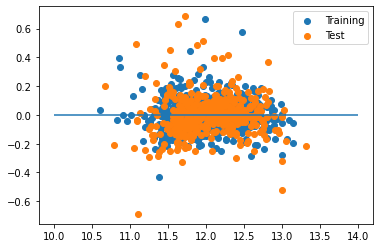

In [129]:
plt.scatter(train_pred,train_pred - y_train,label='Training')
plt.scatter(test_pred,test_pred - y_test,label='Test')
plt.legend()
plt.hlines(y=0,xmin=10,xmax=14)

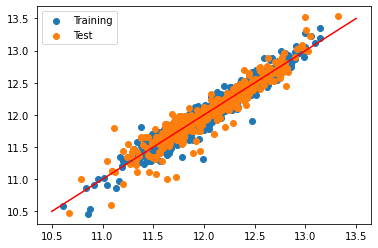

In [130]:
plt.scatter(train_pred,y_train,label='Training')
plt.scatter(test_pred,y_test,label='Test')
plt.legend()
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")

In [131]:
ridge = RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(x_train,y_train)


RidgeCV(alphas=array([1.e-02, 3.e-02, 6.e-02, 1.e-01, 3.e-01, 6.e-01, 1.e+00, 3.e+00,
       6.e+00, 1.e+01, 3.e+01, 6.e+01]))

In [132]:
alpha = ridge.alpha_
alpha

3.0

In [133]:
ridge = RidgeCV(alphas=[alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(x_train,y_train)

RidgeCV(alphas=array([1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  , 3.15, 3.3 ,
       3.45, 3.75, 3.9 , 4.05, 4.2 ]),
        cv=5)

In [134]:
alpha = ridge.alpha_
alpha

3.0

In [135]:
rmse_cv_train(ridge).mean() , rmse_cv_test(ridge).mean()

(0.12937446477432862, 0.13526428833289222)

In [136]:
train_pred_ridge = ridge.predict(x_train)
test_pred_ridge = ridge.predict(x_test)

In [137]:
x.shape

(1460, 221)

In [138]:
len(ridge.coef_)

221

In [139]:
coef = pd.Series(ridge.coef_,index=x.columns)

In [140]:
print('Ridge picked ',len(coef[ coef != 0 ]),'features, drop ',len(coef[ coef == 0 ]),' features')

Ridge picked  216 features, drop  5  features


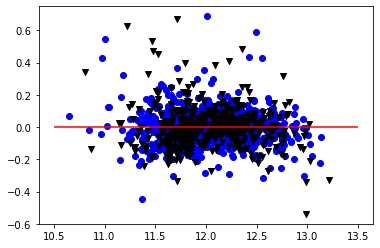

In [141]:
plt.scatter(train_pred_ridge, train_pred_ridge - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred_ridge, test_pred_ridge - y_test, c = "black", marker = "v", label = "Test data")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")

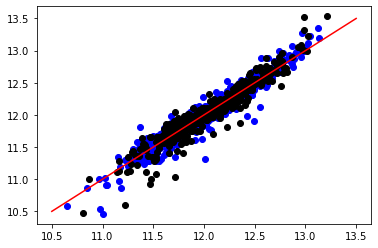

In [142]:
plt.scatter(train_pred_ridge, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred_ridge, y_test, c = "black",  label = "Test data")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")

In [143]:
x.shape, test.shape

((1460, 221), (1459, 221))

In [144]:
lr.fit(x,y)
y_pred_lr = lr.predict(test)
y_pred_lr

array([11.716823  , 12.0074577 , 12.09831111, ..., 12.05777043,
       11.70189447, 12.30316581])

In [145]:
ridge.fit(x,y)
y_pred_ridge = ridge.predict(test)
y_pred_ridge

array([11.66222173, 11.92892145, 12.08426714, ..., 12.04793393,
       11.64287981, 12.30581689])

In [147]:
submission = pd.read_csv('sample_submission.csv')
submission['SalePrice'] = np.expm1(y_pred_lr)
submission.to_csv('submission_lr_labelEncoded.csv',index=False)

In [148]:
submission['SalePrice'] = np.expm1(y_pred_ridge)
submission.to_csv('submission_ridge_labelEncoded.csv',index=False)